In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor#i need this since its lineair and curved
from sklearn.metrics import mean_squared_error

df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_test

,ID,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
0,0,Residential,24563,15,4,28.52,Weekday
1,1,Commercial,27583,56,23,23.07,Weekend
2,2,Commercial,45313,4,44,33.56,Weekday
3,3,Residential,41625,84,17,27.39,Weekend
4,4,Residential,36720,58,47,17.08,Weekday
...,...,...,...,...,...,...,...
95,95,Commercial,1161,81,11,15.45,Weekend
96,96,Residential,37943,50,23,21.73,Weekend
97,97,Commercial,1558,27,29,16.86,Weekend
98,98,Industrial,2145,56,12,11.77,Weekend


In [69]:
df_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1000 non-null   int64  
 1   Building Type        1000 non-null   str    
 2   Square Footage       1000 non-null   int64  
 3   Number of Occupants  1000 non-null   int64  
 4   Appliances Used      1000 non-null   int64  
 5   Average Temperature  1000 non-null   float64
 6   Day of Week          1000 non-null   str    
 7   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(4), str(2)
memory usage: 62.6 KB


In [70]:
df_test.info()
#no missing values

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   100 non-null    int64  
 1   Building Type        100 non-null    str    
 2   Square Footage       100 non-null    int64  
 3   Number of Occupants  100 non-null    int64  
 4   Appliances Used      100 non-null    int64  
 5   Average Temperature  100 non-null    float64
 6   Day of Week          100 non-null    str    
dtypes: float64(1), int64(4), str(2)
memory usage: 5.6 KB


In [71]:
#dropping unnacessary features
df_train.drop(["ID"],axis=1,inplace=True)
id=df_test["ID"]#add it later
df_test.drop(["ID"],axis=1,inplace=True)


In [72]:
#we scale the square footage columns, we use standardization 
df_train["Square Footage"]=StandardScaler().fit_transform(df_train[["Square Footage"]])
df_test["Square Footage"]=StandardScaler().fit_transform(df_test[["Square Footage"]])

In [ ]:
#we convert categorical column 
mapping_dict = {
    'Weekday': 0,
    'Weekend': 1
}

# Apply the mapping to create a new column
df_train['Day of Week'] = df_train['Day of Week'].map(mapping_dict)
df_test['Day of Week'] = df_test['Day of Week'].map(mapping_dict)
df_test


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
0,Residential,-0.096678,15,4,28.52,5
1,Commercial,0.124691,56,23,23.07,2
2,Commercial,1.424321,4,44,33.56,5
3,Residential,1.153986,84,17,27.39,2
4,Residential,0.794444,58,47,17.08,5
...,...,...,...,...,...,...
95,Commercial,-1.812072,81,11,15.45,2
96,Residential,0.884091,50,23,21.73,2
97,Commercial,-1.782972,27,29,16.86,2
98,Industrial,-1.739944,56,12,11.77,2


In [74]:
#converting categorical data by one hot encoding
df_train = pd.get_dummies(df_train, columns=["Building Type"], dtype=int)
df_test = pd.get_dummies(df_test, columns=["Building Type"], dtype=int)


In [75]:
y_train=df_train[["Energy Consumption"]]
df_train.drop(["Energy Consumption"],axis=1,inplace=True)
df_train

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Building Type_Commercial,Building Type_Industrial,Building Type_Residential
0,-1.287805,76,10,29.84,5,0,0,1
1,1.323516,66,45,16.72,5,1,0,0
2,-0.434466,37,17,14.30,2,0,1,0
3,-0.853716,14,41,32.82,5,0,0,1
4,-0.846017,26,18,11.92,5,1,0,0
...,...,...,...,...,...,...,...,...
995,-0.772946,68,44,23.95,2,0,0,1
996,-0.928677,7,22,14.67,2,0,1,0
997,0.986856,88,20,32.18,5,1,0,0
998,-1.197865,67,37,16.48,2,0,0,1


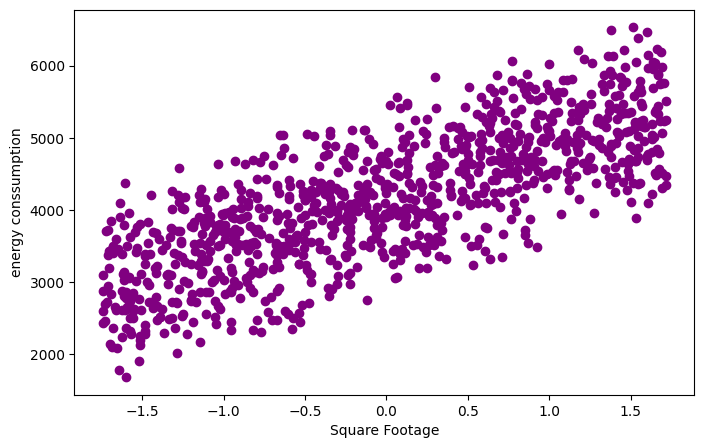

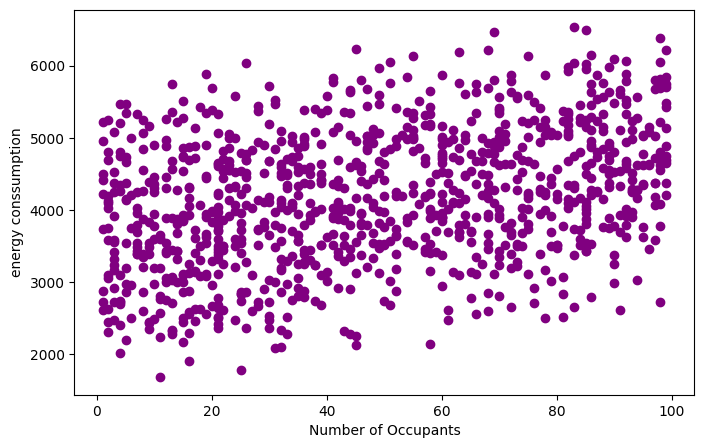

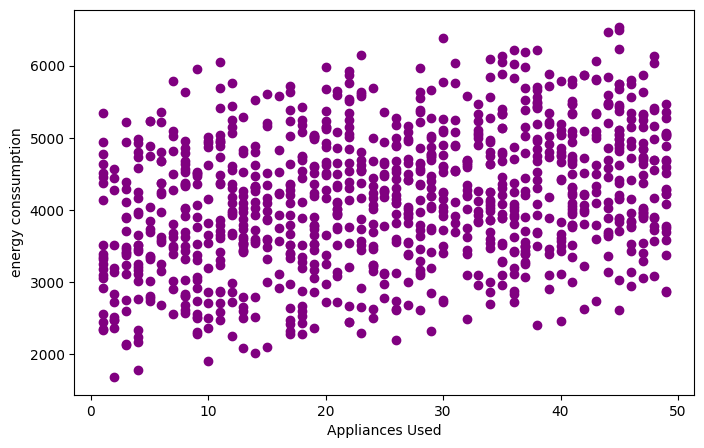

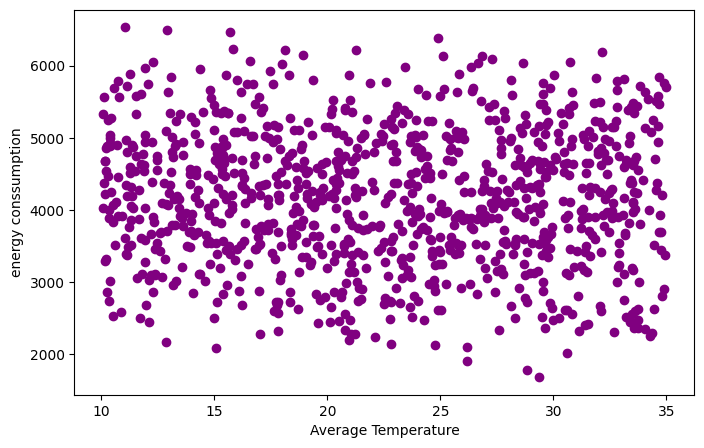

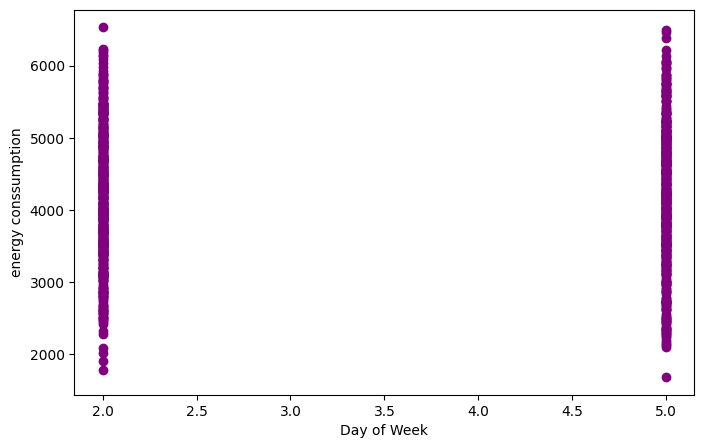

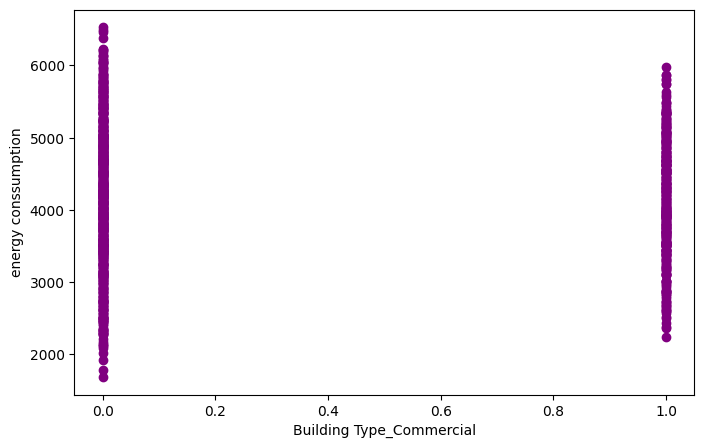

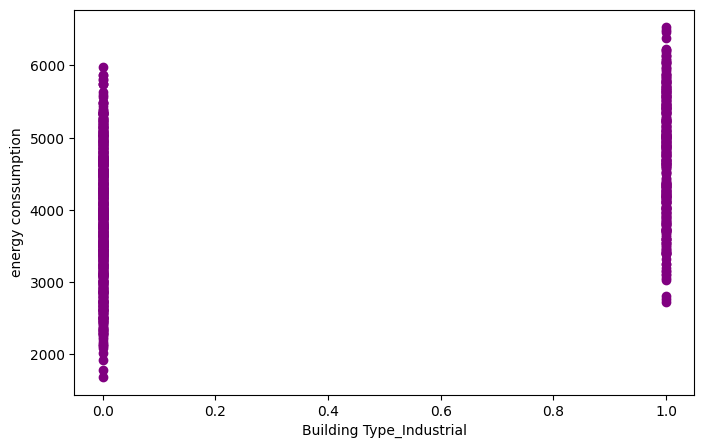

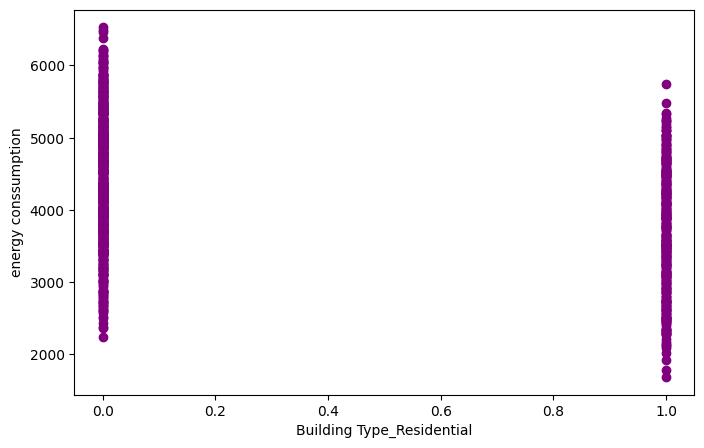

In [76]:
for col in df_train.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(df_train[col],y_train,color="purple")
    plt.xlabel(col)
    plt.ylabel("energy conssumption")
    plt.show()

In [77]:
# Random Forest handles linear AND curved automatically
rf_model = RandomForestRegressor()
rf_model.fit(df_train, y_train)  # No need to specify which is curved!

C:\Users\PC\AppData\Roaming\Python\Python314\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [78]:
predictions=rf_model.predict(df_test)
submit=pd.DataFrame({
    "ID":id,
    "Energy consumption":predictions
})
submit.to_csv("submit.csv",index=False)
